<a href="https://colab.research.google.com/github/OluwatimilehinF/Personal-tasks/blob/main/Predicting_Employee's_Salary_Range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#PREDICTION EMPLOYEE'S SALARY USING KNEAREST NEIGHBOR

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#import file

In [5]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary (2).csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['salary.csv']))

In [7]:
#Summarizing data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [9]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [10]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K':0, '>50K':1}).astype(int)

In [11]:
#Quick statistical check

In [12]:
df.describe()

,age,education.num,capital.gain,hours.per.week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456,0.240810
std,13.640433,2.572720,7385.292085,12.347429,0.427581
min,17.000000,1.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,99.000000,1.000000


In [13]:
df.isnull().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

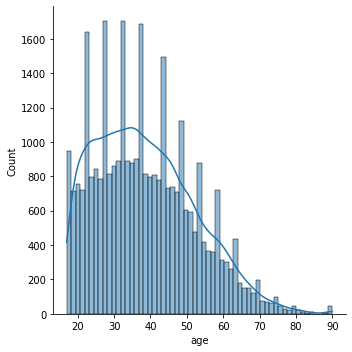

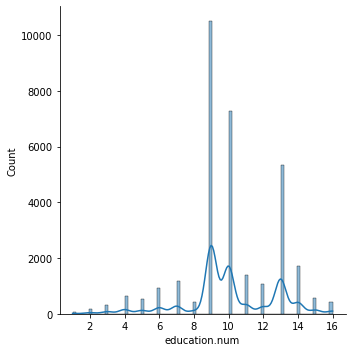

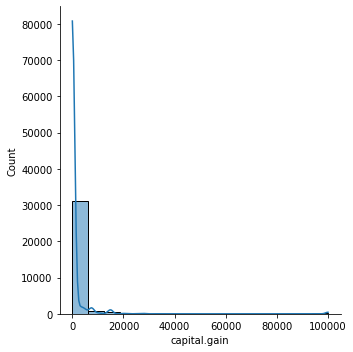

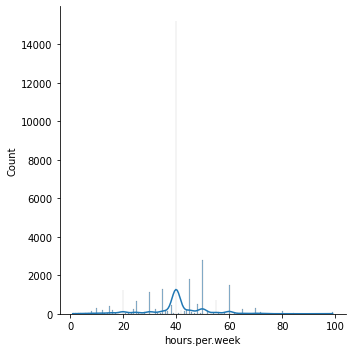

In [14]:
sns.displot(df['age'], kde=True)
sns.displot(df['education.num'], kde=True)
sns.displot(df['capital.gain'], kde=True)
sns.displot(df['hours.per.week'], kde=True)

In [15]:
#Visualiazing the data to check for outlier

In [16]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show

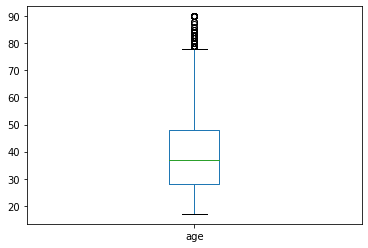

In [17]:
plot_boxplot(df, 'age')


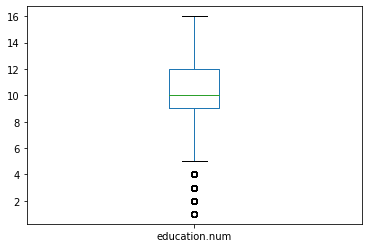

In [18]:
plot_boxplot(df, 'education.num')

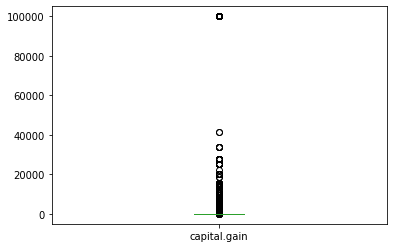

In [19]:
plot_boxplot(df,'capital.gain')

In [20]:
df['capital.gain']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital.gain, Length: 32561, dtype: int64

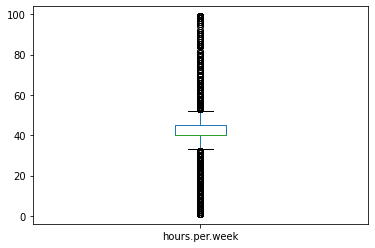

In [21]:
plot_boxplot(df, 'hours.per.week')

In [22]:
#Identifying outliers

In [23]:
age = df['age']
edu = df['education.num']
cap = df['capital.gain']
hpw = df['hours.per.week']
outliers = []
def detect_outliers_iqr(data_set):
    data_set = data_set.sort_values()
    Q1 = np.percentile(data_set, 25)
    Q3 = np.percentile(data_set, 75) 
    #print(q1, q3)
    IQR =     Q3-Q1
    lwr_bound = Q1-(1.5*IQR)
    upr_bound = Q3+(1.5*IQR)

    for a in data_set:
        if (a<lwr_bound or a>upr_bound):
            outliers.append(a)
    return outliers



In [24]:
#Removing outliers in age and education.num columns

In [25]:
sample_outliers_age = detect_outliers_iqr(age)
out1 = pd.array(sample_outliers_age)
out1

<IntegerArray>
[79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
 ...
 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]
Length: 143, dtype: Int64

In [26]:
sample_outliers_edu = detect_outliers_iqr(edu)
out2 = pd.array(sample_outliers_edu)
out2

<IntegerArray>
[79, 79, 79, 79, 79, 79, 79, 79, 79, 79,
 ...
  4,  4,  4,  4,  4,  4,  4,  4,  4,  4]
Length: 1341, dtype: Int64

In [27]:
df['age'] = df['age'].replace(out1, np.nan)

In [28]:
df['education.num'] = df['education.num'].replace(out2, np.nan)

In [29]:
df.isna().sum()

age                143
education.num     1198
capital.gain         0
hours.per.week       0
income               0
dtype: int64

In [30]:
df_new = df.dropna(how='any')

In [31]:
df_new.head()

,age,education.num,capital.gain,hours.per.week,income
2,66.0,10.0,0,40,0
4,41.0,10.0,0,40,0
5,34.0,9.0,0,45,0
6,38.0,6.0,0,40,0
7,74.0,16.0,0,20,1


In [32]:
#Visualizing data after removing outliers

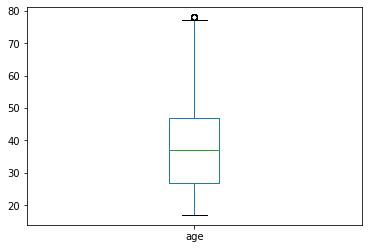

In [33]:
plot_boxplot(df_new, 'age')

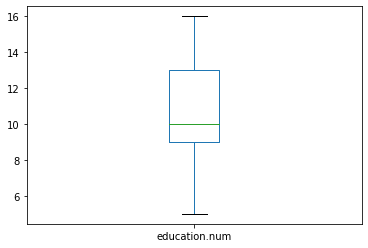

In [34]:
plot_boxplot(df_new, 'education.num')

In [35]:
df_new.corr()

,age,education.num,capital.gain,hours.per.week,income
age,1.000000,0.112834,0.083989,0.099961,0.260167
education.num,0.112834,1.000000,0.130093,0.163045,0.342566
capital.gain,0.083989,0.130093,1.000000,0.079116,0.222379
hours.per.week,0.099961,0.163045,0.079116,1.000000,0.231769
income,0.260167,0.342566,0.222379,0.231769,1.000000


In [36]:
#Segregating the dataset

In [37]:
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values

In [38]:
#splitting 

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [40]:
#feature scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
#Finding the best K-value

Text(0.5, 1.0, 'K-value Vs Mean error')

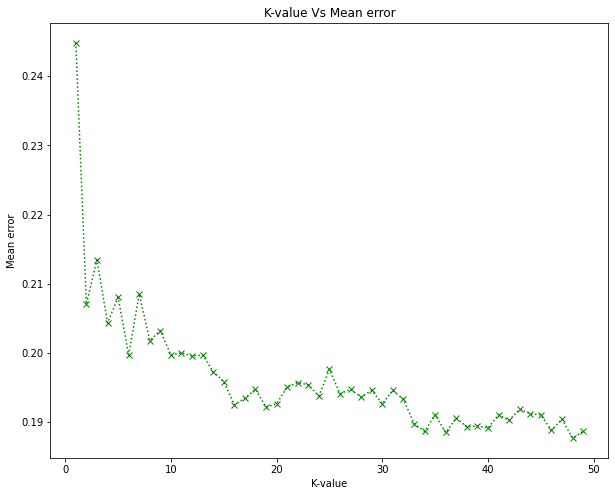

In [43]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,50):
    kn = KNeighborsClassifier(n_neighbors = i)
    kn.fit(X_train, y_train)
    pred_i = kn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10,8))
plt.plot(range(1,50), error, color='green', linestyle='dotted', marker='x', markerfacecolor='black')
plt.xlabel("K-value")
plt.ylabel("Mean error")
plt.title("K-value Vs Mean error")


In [44]:
#Training

In [45]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=48, metric = 'minkowski', p=2)
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=48)

In [46]:
#Prediction for test data

In [47]:
y_pred = kn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
#Evaluating model

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("confusin matrix is: ")
print(cm)

confusin matrix is: 
[[4396  279]
 [ 894  680]]


In [50]:
ac = accuracy_score(y_test,y_pred)*100
acc_value = ac.round(3)
print("Accuracy of Model: {0}%".format(acc_value))

Accuracy of Model: 81.229%


In [51]:
#Prediction

In [52]:
age1 = int(input("Enter Employee's Age:"))
edu1 = int(input("Enter Employee's Education Number: "))
cap1 = int(input("Enter Employee's Capital gain: "))
hpw1 = int(input("Enter Employee's Hours per week: "))
new_1 = [[age1, edu1, cap1, hpw1]]
result = kn.predict(sc.transform(new_1))
if result ==1:
    print("EMPLOYEE IS RECEIVING SALRAY ABOVE 50K")
else:
    print("EMPLOYER IS RECEIVING SALARY LESS THAN 50K")

Enter Employee's Age:50
Enter Employee's Education Number: 12
Enter Employee's Capital gain: 90000
Enter Employee's Hours per week: 20
EMPLOYEE IS RECEIVING SALRAY ABOVE 50K
